<a href="https://colab.research.google.com/github/Pranavee78/impulse/blob/main/task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

aynahd_noisy_eeg_data_path = kagglehub.dataset_download('aynahd/noisy-eeg-data')
aynahd_clean_signals_path = kagglehub.dataset_download('aynahd/clean-signals')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries intalled
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/5955.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/422.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/970.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/6179.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/100.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/1876.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/1041.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/4542.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/6052.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/4248.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/3191.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/63.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_Seizures/1364.npy
/kaggle/input/clean-signals/train_data/Complex_Partial_S

baseline noise removal with DWT.

powerline noise removal with notch filter.

adaptive filtering from EMG.

evaluation with pnsr.

before vs after.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to the dataset folders
data_path = '/kaggle/input/noisy-eeg-data/noisy_train_data'
folders = ['Normal', 'Complex_Partial_Seizures', 'Electrographic_Seizures', 'Video_detected_Seizures_with_no_visual_change_over_EEG']

In [ ]:
def load_eeg_data(folder):
    # Create the full folder path
    folder_path = os.path.join(data_path, folder)
    print(f"Checking folder path: {folder_path}")

    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        return None

    # List all files in the folder
    files = os.listdir(folder_path)
    print(f"Files in {folder}: {files}")

    # Check if the folder is empty
    if not files:
        print(f"Folder {folder_path} is empty.")
        return None

    # Get the first file and check if it's a .npy file
    file_path = os.path.join(folder_path, files[0])
    if not file_path.endswith('.npy'):
        print(f"Skipping {file_path} as it is not a .npy file.")
        return None

    # Attempt to load the .npy file
    print(f"Loading data from: {file_path}")
    try:
        data = np.load(file_path)
        print(f"Loaded data shape: {data.shape}")
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

# Iterate through the folders and load one file from each
for folder in folders:
    print(f"Processing folder: {folder}")
    data = load_eeg_data(folder)
    if data is not None:
        print(data)  # Print the data (or process it further)
    else:
        print(f"No data loaded from folder: {folder}")

Processing folder: Normal
Checking folder path: /kaggle/input/noisy-eeg-data/noisy_train_data/Normal
Files in Normal: ['4548.npy', '5788.npy', '3709.npy', '6104.npy', '4684.npy', '2765.npy', '5197.npy', '5590.npy', '5669.npy', '331.npy', '4299.npy', '2434.npy', '4769.npy', '6082.npy', '4960.npy', '2424.npy', '4621.npy', '4706.npy', '6862.npy', '1200.npy', '3155.npy', '3844.npy', '719.npy', '4791.npy', '6773.npy', '5575.npy', '6254.npy', '4792.npy', '1191.npy', '461.npy', '4155.npy', '5980.npy', '3006.npy', '2083.npy', '1778.npy', '1702.npy', '5175.npy', '2528.npy', '4093.npy', '3996.npy', '2803.npy', '4136.npy', '6222.npy', '3992.npy', '2980.npy', '6365.npy', '5952.npy', '1965.npy', '6002.npy', '4705.npy', '464.npy', '2942.npy', '1479.npy', '4780.npy', '6699.npy', '4184.npy', '122.npy', '2785.npy', '3914.npy', '4495.npy', '1175.npy', '6549.npy', '407.npy', '2114.npy', '3799.npy', '5614.npy', '4186.npy', '5167.npy', '3302.npy', '6001.npy', '2704.npy', '2160.npy', '3854.npy', '2013.npy',

In [ ]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.fft import fft


noisy_data = '/kaggle/input/noisy-eeg-data/noisy_train_data'
class_labels = {
    "Complex_Partial_Seizures": 0,
    "Electrographic_Seizures": 1,
    "Normal": 2,
    "Video_detected_Seizures_with_no_visual_change_over_EEG": 3
}

In [ ]:
x_train = []
y_train = []

for class_name, label in class_labels.items():
    class_folder = os.path.join(noisy_data, class_name)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        if file_name.endswith('.npy'):
            data = np.load(file_path)
            x_train.append(data)
            y_train.append(label)

In [ ]:
x_clean = []
y_clean = []
train_data_path = '/kaggle/input/clean-signals/train_data'

for class_name, label in class_labels.items():
    class_folder = os.path.join(train_data_path, class_name)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        if file_name.endswith('.npy'):
            data = np.load(file_path)
            x_clean.append(data)
            y_clean.append(label)


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)


(5608, 19, 500)
(5608,)


PSNR calculation skipped: operands could not be broadcast together with shapes (5608,) (53276000,) 


<ipython-input-35-7a58fe9fdf7f>:97: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


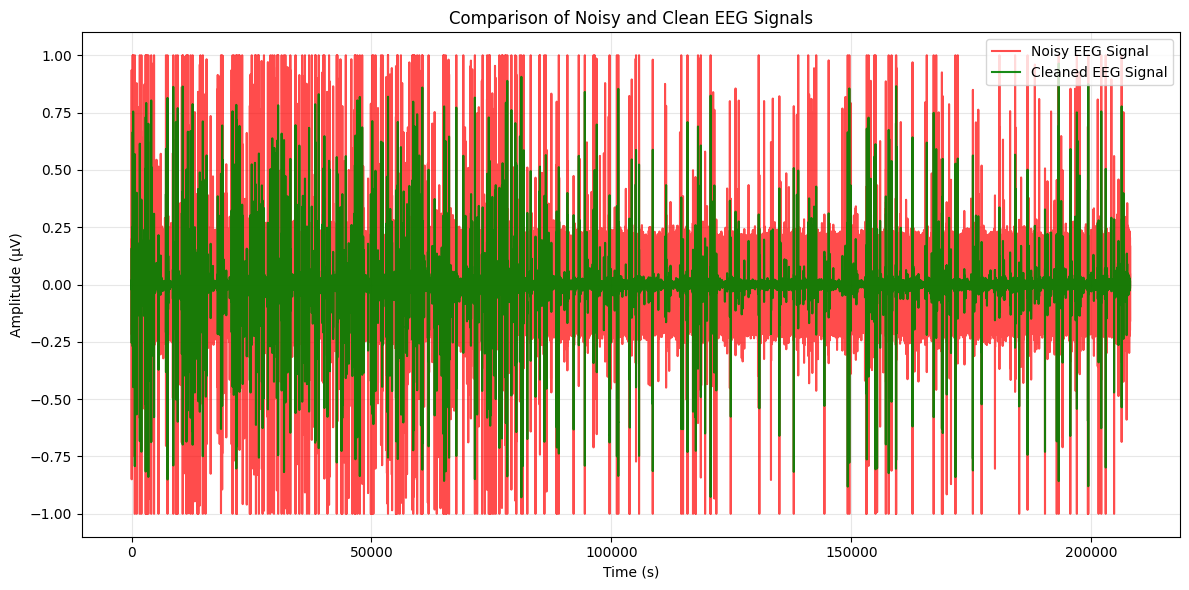

In [ ]:
import numpy as np
import pywt
from scipy.signal import iirnotch, filtfilt
import matplotlib.pyplot as plt

# Function for wavelet-based denoising
def wavelet_denoise_eeg(signal, wavelet='db4', level=6):
    coeffs = pywt.wavedec(signal, wavelet, mode='per')
    threshold = np.sqrt(2 * np.log(len(signal))) * np.median(np.abs(coeffs[-level]) / 0.6745)
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    return pywt.waverec(denoised_coeffs, wavelet, mode='per')

# Function for notch filtering
def notch_filter_eeg(signal, notch_freq, quality_factor, fs):
    b, a = iirnotch(notch_freq, quality_factor, fs)
    return filtfilt(b, a, signal)

# Adaptive filter function
def adaptive_filter_eeg(desired_signal, reference_noise, mu=0.01, filter_order=2):
    # Convert inputs to NumPy arrays
    desired_signal = np.array(desired_signal)
    reference_noise = np.array(reference_noise)

    # Flatten multi-dimensional reference noise if necessary
    if reference_noise.ndim > 1:
        reference_noise = reference_noise.flatten()

    # Ensure reference noise is long enough
    if len(reference_noise) < len(desired_signal):
        # Pad the reference noise with zeros if it is shorter
        padding = len(desired_signal) - len(reference_noise)
        reference_noise = np.pad(reference_noise, (0, padding), mode='constant')

    if len(reference_noise) < filter_order:
        raise ValueError("Reference noise length must be greater than filter order.")

    # Initialize filter weights and filtered signal
    w = np.zeros(filter_order)
    y = np.zeros_like(desired_signal)

    # Adaptive filtering
    for i in range(filter_order, len(desired_signal)):
        x = reference_noise[i-filter_order:i]  # Sliding window of reference noise
        y[i] = np.dot(w, x)  # Filtered output
        e = desired_signal[i] - y[i]  # Error signal
        w += 2 * mu * e * x  # Update filter weights

    return y

# PSNR calculation function
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = np.max(original)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Main processing
fs = 256  # Sampling frequency
notch_freq = 50  # Notch frequency
quality_factor = 30  # Notch filter sharpness

# Example EEG signal processing
eeg_signal = np.array(x_train).flatten()  # Assuming x_train contains noisy signals
denoised_signal_dwt = wavelet_denoise_eeg(eeg_signal)

filtered_signal_notch = notch_filter_eeg(denoised_signal_dwt, notch_freq, quality_factor, fs)

# Use a clean reference signal (e.g., from a specific channel or source)
try:
    clean_reference_signal = np.array(x_clean).flatten()  # Flatten if necessary
    filtered_signal_adaptive = adaptive_filter_eeg(filtered_signal_notch, clean_reference_signal)
except Exception as e:
    print(f"Adaptive filtering skipped: {e}")
    filtered_signal_adaptive = filtered_signal_notch

# PSNR evaluation (requires ground truth clean signal for comparison)
try:
    clean_signal = np.array(y_train).flatten()  # Assuming y_train contains clean ground truth
    psnr = calculate_psnr(clean_signal, filtered_signal_adaptive)
    print(f"PSNR: {psnr:.2f} dB")
except Exception as e:
    print(f"PSNR calculation skipped: {e}")

# Visualization
time = np.linspace(0, len(eeg_signal) / fs, len(eeg_signal))

plt.figure(figsize=(12, 6))
plt.plot(time, eeg_signal, label='Noisy EEG Signal', color='red', alpha=0.7)
plt.plot(time, filtered_signal_adaptive, label='Cleaned EEG Signal', color='green', alpha=0.9)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Comparison of Noisy and Clean EEG Signals')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
